<a href="https://colab.research.google.com/github/pooja-thalur/511_SimilarityMatching/blob/main/FinalProject511_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Names: Affan Shariff, Aryan Varma Sagi, Pooja Thalur, Vishal Sharma Oruganti
# Subject: Big Data Analytics

import pandas as pd
df = pd.read_csv('/content/sample_data/ProjectStep2.csv')
df

,School Name,State Name [District] 2022-23,County Name [District] 2022-23,Web Site URL [District] 2022-23,Location Address 1 [District] 2022-23,Location City [District] 2022-23,Location ZIP [District] 2022-23,Phone Number [District] 2022-23,Locale [District] 2022-23,Latitude [District] 2022-23,...,Male Students [District] 2022-23,Female Students [District] 2022-23,American Indian/Alaska Native Students [District] 2022-23,Asian or Asian/Pacific Islander Students [District] 2022-23,Hispanic Students [District] 2022-23,Black or African American Students [District] 2022-23,White Students [District] 2022-23,Nat. Hawaiian or Other Pacific Isl. Students [District] 2022-23,Two or More Races Students [District] 2022-23,AP Program Offered
0,A+ CHARTER SCHOOLS (1000166),ARIZONA,Pinal County,http://aplusaz.org,41600 W Smith-Enke Rd,MARICOPA,85138,5202655589,32-Town: Distant,33.042533,...,155,113,2,2,114,32,106,1,11,NO
1,ACADEMY WITH COMMUNITY PARTNERS INC (79213),ARIZONA,Maricopa County,http://www.acpathope.org,433 N HALL,MESA,85203,4808330068,11-City: Large,33.423526,...,89,82,10,3,93,13,43,0,9,NO
2,ACCELERATED LEARNING CENTER INC. (4297),ARIZONA,Maricopa County,http://acceleratedlearningcenteraz.comDr.,4105 E SHEA BLVD,PHOENIX,85028,6024850309,11-City: Large,33.582212,...,72,81,2,0,27,7,111,0,6,NO
3,ACCLAIM CHARTER SCHOOL (4325),ARIZONA,Maricopa County,http://www.acclaimacademy.org,7624 W INDIAN SCHOOL RD,PHOENIX,85033,6236910919,11-City: Large,33.495776,...,151,117,0,0,226,1,38,2,1,NO
4,AGUA FRIA UNION HIGH SCHOOL DISTRICT (4289),ARIZONA,Maricopa County,http://www.aguafria.org,1481 N ELISEO FELIX JR WAY STE,AVONDALE,85323,6239327000,22-Suburb: Mid-size,33.450600,...,4899,4733,78,313,4923,941,2900,42,435,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,WEST VALLEY ARTS AND TECHNOLOGY ACADEMY INC. (...,ARIZONA,Maricopa County,http://www.Riverbendprep.org,5625 S 51ST AVE,LAVEEN,85339,6022853003,11-City: Large,33.394980,...,130,117,19,3,147,61,6,0,11,NO
350,WEST-MEC - WESTERN MARICOPA EDUCATION CENTER (...,ARIZONA,Maricopa County,http://www.west-mec.org,5487 N 99TH AVE,GLENDALE,85305,6237380022,11-City: Large,33.515170,...,164,128,4,9,0,30,226,3,20,NO
351,WESTERN SCHOOL OF SCIENCE AND TECHNOLOGY INC. ...,ARIZONA,Maricopa County,http://western.cfacademy.school,6515 W INDIAN SCHOOL RD,PHOENIX,85033,6232493900,11-City: Large,33.493699,...,245,277,2,0,509,7,4,0,0,YES
352,WICKENBURG UNIFIED DISTRICT (4236),ARIZONA,Maricopa County,http://www.wickenburgschools.org/,101 COCONINO ST,WICKENBURG,85390,9286685350,41-Rural: Fringe,33.968197,...,651,647,11,4,503,41,698,4,37,NO


In [3]:
#Data PreProcessing

#drop unnecessary columns
cols = ['State Name [District] 2022-23', 'Web Site URL [District] 2022-23','Phone Number [District] 2022-23','Location Address 1 [District] 2022-23']
df = df.drop(cols,axis=1)

#checking for values with na in both rows and columns
df.isna().any(axis=0)
df.isna().any(axis=1)
df.dropna()

#removing unwanted string in the headers
df.columns=df.columns.str.replace('[District] 2022-23','')
df.columns

county_names= df['County Name '].value_counts().index.tolist()

maricopa=[0]* len(df)
pinal=[0]* len(df)
#Transform Country name column by converting it to binary
for i in range (0,len(df)):
  if df.iloc[i]['County Name ']=='Maricopa County':
    maricopa[i]=1
  else:
    pinal[i]=1
#add county names into df
df[county_names[0]] = maricopa
df[county_names[1]] = pinal

#since County Name is redundant and not necessary drop the column
df.drop('County Name ', axis=1, inplace=True)
df.head()

#convert the value of Ap Program offered column from Yes and NO to 0,1s
df['AP Program Offered'].value_counts()
# NO     321
# YES     33
df['AP Program Offered'].replace('YES', 1, inplace=True)
df['AP Program Offered'].replace('NO', 0, inplace=True)

df['Locale '].value_counts()

# https://nces.ed.gov/programs/edge/docs/locale_classifications.pdf
# 11-City: Large         189
# 21-Suburb: Large        65
# 41-Rural: Fringe        25
# 12-City: Mid-size       20
# 22-Suburb: Mid-size     17
# 42-Rural: Distant       14
# 13-City: Small           8
# 32-Town: Distant         6
# 31-Town: Fringe          5
# 43-Rural: Remote         4
# 33-Town: Remote          1

#converting to nces locale classification code
df['Locale '] = df['Locale '].str[:2]
df['Locale '].value_counts()

for i in df['Locale '].value_counts().index.tolist():
  df['Locale '].replace(i, 'Locale_'+i, inplace=True)
  df['Locale_'+i] = [0]*len(df)

#Since it is Nominal,
#Now convert them into different columns
#iterate over each row and assign their corresponding locale
for i in range(0,len(df['Locale '])):
  df[df['Locale '].iloc[i]].iloc[i]=1

#since locale is not necessary drop the locale column
df.drop('Locale ', axis=1, inplace=True)

#now convert the charter status from string to binary attribute
df['LEA Charter Status '].value_counts()
df['LEA Charter Status '] = df['LEA Charter Status '].apply(lambda x: 0 if 'not' in x else 1)

#now convert the numeric columns to int or float as required
c = {'Male Students ': int,'Female Students ': int,'Total Students, All Grades (Excludes AE) ': int,
     'Total Students, All Grades (Includes AE) ': int,'American Indian/Alaska Native Students ': int,
     'Asian or Asian/Pacific Islander Students ': int,'Hispanic Students ': int,
                'Black or African American Students ':int,'White Students ':int,
     'Nat. Hawaiian or Other Pacific Isl. Students ':int
                }
df = df.astype(c)

#remove duplicates
df.duplicated().sum()
df=df.drop_duplicates()
# df.columns

#transform lat long
min_lat = df['Latitude '].min()
for i in range(0,len(df['Latitude '])):
    df['Latitude '].iloc[i]=df['Latitude '].iloc[i]-min_lat
df['Latitude ']

max_lat = df['Longitude '].min()
print(max_lat)
for i in range(0,len(df['Longitude '])):
    df['Longitude '].iloc[i]=df['Longitude '].iloc[i]-(min_lat)
df['Longitude ']


<ipython-input-3-c4292de2a53f>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Locale '].iloc[i]].iloc[i]=1
<ipython-input-3-c4292de2a53f>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Locale '].iloc[i]].iloc[i]=1
<ipython-input-3-c4292de2a53f>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Locale '].iloc[i]].iloc[i]=1
<ipython-input-3-c4292de2a53f>:68: SettingWithCopyWarning: 
A value is trying to be set 

-113.172756


<ipython-input-3-c4292de2a53f>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude '].iloc[i]=df['Longitude '].iloc[i]-(min_lat)
<ipython-input-3-c4292de2a53f>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude '].iloc[i]=df['Longitude '].iloc[i]-(min_lat)
<ipython-input-3-c4292de2a53f>:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Longitude '].iloc[i]=df['Longitude '].iloc[i]-(min_lat)
<ipython-inpu

0     -144.584795
1     -144.361977
2     -144.561779
3     -144.793285
4     -144.905600
          ...    
349   -144.735971
350   -144.840601
351   -144.769126
352   -145.297628
353   -144.585100
Name: Longitude , Length: 354, dtype: float64

In [4]:
# Transformed data Output
df.head()

,School Name,Location City,Location ZIP,Latitude,Longitude,LEA Charter Status,"Total Students, All Grades (Excludes AE)","Total Students, All Grades (Includes AE)",Male Students,Female Students,...,Locale_21,Locale_41,Locale_12,Locale_22,Locale_42,Locale_13,Locale_32,Locale_31,Locale_43,Locale_33
0,A+ CHARTER SCHOOLS (1000166),MARICOPA,85138,0.473633,-144.584795,1,268,268,155,113,...,0,0,0,0,0,0,1,0,0,0
1,ACADEMY WITH COMMUNITY PARTNERS INC (79213),MESA,85203,0.854626,-144.361977,1,171,171,89,82,...,0,0,0,0,0,0,0,0,0,0
2,ACCELERATED LEARNING CENTER INC. (4297),PHOENIX,85028,1.013312,-144.561779,0,153,153,72,81,...,0,0,0,0,0,0,0,0,0,0
3,ACCLAIM CHARTER SCHOOL (4325),PHOENIX,85033,0.926876,-144.793285,1,268,268,151,117,...,0,0,0,0,0,0,0,0,0,0
4,AGUA FRIA UNION HIGH SCHOOL DISTRICT (4289),AVONDALE,85323,0.881700,-144.905600,0,9632,9632,4899,4733,...,0,0,0,1,0,0,0,0,0,0


In [5]:
# K-Means
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score, silhouette_score
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from yellowbrick.cluster import SilhouetteVisualizer

In [6]:
#Some calculations before trainign
schools_data = df

# Extract features related to popularity
popularity_features = ['Total Students, All Grades (Includes AE) ', 'Total Students, All Grades (Excludes AE) ']

# Subset the DataFrame to include only the popularity features
popularity_data = df[popularity_features]
schools_data['Popularity'] = df['Total Students, All Grades (Includes AE) ']

# Check for missing values and handle them if necessary
popularity_data.isnull().sum()

# Calculate gender ratio (male to female ratio)
schools_data['Gender Ratio'] = schools_data['Male Students '] / schools_data['Female Students ']

# Calculate diversity index (assuming racial diversity)
racial_categories = ['White Students ', 'Black or African American Students ', 'Hispanic Students ', 'Asian or Asian/Pacific Islander Students ',
                     'American Indian/Alaska Native Students ', 'Nat. Hawaiian or Other Pacific Isl. Students ',
       'Two or More Races Students ']
for category in racial_categories:
    schools_data[category + '_Proportion'] = schools_data[category] / schools_data['Total Students, All Grades (Includes AE) ']

schools_data['Diversity Index'] = 1 - schools_data[[category + '_Proportion' for category in racial_categories]].pow(2).sum(axis=1)

# Extract features related to gender ratio and inclusivity
# gender_inclusivity_features = ['Gender Ratio', 'Diversity Index','Latitude ','Longitude ',]
# gender_inclusivity_data = schools_data[gender_inclusivity_features]
numerical_data = ['Popularity','Diversity Index', 'Gender Ratio', 'Total Students, All Grades (Includes AE) ',
                  'Male Students ',
       'Female Students ', 'American Indian/Alaska Native Students ',
       'Asian or Asian/Pacific Islander Students ', 'Hispanic Students ',
       'Black or African American Students ', 'White Students ',
       'Nat. Hawaiian or Other Pacific Isl. Students ',
       'Two or More Races Students ', 'AP Program Offered', 'Maricopa County',
       'Pinal County', 'Locale_11', 'Locale_21', 'Locale_41', 'Locale_12',
       'Locale_22', 'Locale_42', 'Locale_13', 'Locale_32', 'Locale_31',
       'Locale_43', 'Locale_33']
# print(gender_inclusivity_data.head())
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
features_for_clustering_imputed = imp.fit_transform(schools_data[numerical_data])

scaler = StandardScaler()
features_for_clustering_imputed = scaler.fit_transform(features_for_clustering_imputed)
# schools_data[numerical_data] = scaler.fit_transform(schools_data[numerical_data])

features = features_for_clustering_imputed #schools_data[['Popularity', 'Gender Ratio', 'Diversity Index', 'AP Program Offered']]

similarity_matrix = cosine_similarity(features)
similarity_matrix
features_for_clustering_imputed

array([[-0.32508262,  0.81336117,  0.60701705, ..., -0.11969397,
        -0.1069045 , -0.05322463],
       [-0.34102747,  0.7011769 ,  0.06037403, ..., -0.11969397,
        -0.1069045 , -0.05322463],
       [-0.34398631, -0.49309394, -0.3147462 , ..., -0.11969397,
        -0.1069045 , -0.05322463],
       ...,
       [-0.28333012, -2.94332064, -0.32317041, ..., -0.11969397,
        -0.1069045 , -0.05322463],
       [-0.15577132,  0.26143918, -0.09080564, ..., -0.11969397,
        -0.1069045 , -0.05322463],
       [-0.19209928, -1.4066291 , -0.14815057, ..., -0.11969397,
        -0.1069045 , -0.05322463]])

In [7]:
schools_data

,School Name,Location City,Location ZIP,Latitude,Longitude,LEA Charter Status,"Total Students, All Grades (Excludes AE)","Total Students, All Grades (Includes AE)",Male Students,Female Students,...,Popularity,Gender Ratio,White Students _Proportion,Black or African American Students _Proportion,Hispanic Students _Proportion,Asian or Asian/Pacific Islander Students _Proportion,American Indian/Alaska Native Students _Proportion,Nat. Hawaiian or Other Pacific Isl. Students _Proportion,Two or More Races Students _Proportion,Diversity Index
0,A+ CHARTER SCHOOLS (1000166),MARICOPA,85138,0.473633,-144.584795,1,268,268,155,113,...,268,1.371681,0.395522,0.119403,0.425373,0.007463,0.007463,0.003731,0.041045,0.646553
1,ACADEMY WITH COMMUNITY PARTNERS INC (79213),MESA,85203,0.854626,-144.361977,1,171,171,89,82,...,171,1.085366,0.251462,0.076023,0.543860,0.017544,0.058480,0.000000,0.052632,0.628706
2,ACCELERATED LEARNING CENTER INC. (4297),PHOENIX,85028,1.013312,-144.561779,0,153,153,72,81,...,153,0.888889,0.725490,0.045752,0.176471,0.000000,0.013072,0.000000,0.039216,0.438720
3,ACCLAIM CHARTER SCHOOL (4325),PHOENIX,85033,0.926876,-144.793285,1,268,268,151,117,...,268,1.290598,0.141791,0.003731,0.843284,0.000000,0.000000,0.007463,0.003731,0.268685
4,AGUA FRIA UNION HIGH SCHOOL DISTRICT (4289),AVONDALE,85323,0.881700,-144.905600,0,9632,9632,4899,4733,...,9632,1.035073,0.301080,0.097695,0.511109,0.032496,0.008098,0.004360,0.045162,0.635394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,WEST VALLEY ARTS AND TECHNOLOGY ACADEMY INC. (...,LAVEEN,85339,0.826080,-144.735971,1,247,247,130,117,...,247,1.111111,0.024291,0.246964,0.595142,0.012146,0.076923,0.000000,0.044534,0.576177
350,WEST-MEC - WESTERN MARICOPA EDUCATION CENTER (...,GLENDALE,85305,0.946270,-144.840601,0,292,292,164,128,...,292,1.281250,0.773973,0.102740,0.000000,0.030822,0.013699,0.010274,0.068493,0.384476
351,WESTERN SCHOOL OF SCIENCE AND TECHNOLOGY INC. ...,PHOENIX,85033,0.924799,-144.769126,1,522,522,245,277,...,522,0.884477,0.007663,0.013410,0.975096,0.000000,0.003831,0.000000,0.000000,0.048935
352,WICKENBURG UNIFIED DISTRICT (4236),WICKENBURG,85390,1.399297,-145.297628,0,1298,1298,651,647,...,1298,1.006182,0.537750,0.031587,0.387519,0.003082,0.008475,0.003082,0.028505,0.558752


In [8]:
# First feature selection
def progressiveFeatureSelection(df, feature_list, n_clusters=3, max_features=4,):
    '''
    very basic implementation of an algorithm for feature selection (unsupervised clustering);
    inspired by this post:
    https://datascience.stackexchange.com/questions/67040/how-to-do-feature-selection-for-clustering-and-implement-it-in-python
    '''
    # feature_list = list(df.columns)
    selected_features = list()
    # select starting feature
    initial_feature = ""
    high_score = 0
    for feature in feature_list:
      print(feature)
      kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
      data_ = df[feature]
      labels = kmeans.fit_predict(data_.to_frame())
      score_ = silhouette_score(data_.to_frame(), labels)
      print("Proposed new feature {} with score {}". format(feature, score_))
      if score_ >= high_score:
          initial_feature = feature
          high_score = score_
    print("The initial feature is {} with a silhouette score of {}.".format(initial_feature, high_score))
    feature_list.remove(initial_feature)
    selected_features.append(initial_feature)
    for _ in range(max_features-1):
        high_score = 0
        selected_feature = ""
        print("Starting selection {}...".format(_))
        for feature in feature_list:
            selection_ = selected_features.copy()
            selection_.append(feature)
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
            data_ = df[selection_]
            labels = kmeans.fit_predict(data_)
            score_ = silhouette_score(data_, labels)
            print("Proposed new feature {} with score {}". format(feature, score_))
            if score_ > high_score:
                selected_feature = feature
                high_score = score_
        selected_features.append(selected_feature)
        feature_list.remove(selected_feature)
        print("Selected new feature {} with score {}". format(selected_feature, high_score))
    return selected_features

progressiveFeatureSelection(schools_data, numerical_data,6)

Popularity
Proposed new feature Popularity with score 0.831638460972142
Diversity Index
Proposed new feature Diversity Index with score 0.5575994562391802
Gender Ratio
Proposed new feature Gender Ratio with score 0.5037890281941952
Total Students, All Grades (Includes AE) 
Proposed new feature Total Students, All Grades (Includes AE)  with score 0.831638460972142
Male Students 
Proposed new feature Male Students  with score 0.8319523458752347
Female Students 
Proposed new feature Female Students  with score 0.8266292577363991
American Indian/Alaska Native Students 
Proposed new feature American Indian/Alaska Native Students  with score 0.8353105843940151
Asian or Asian/Pacific Islander Students 
Proposed new feature Asian or Asian/Pacific Islander Students  with score 0.7674077295588162
Hispanic Students 
Proposed new feature Hispanic Students  with score 0.8293268985538595
Black or African American Students 
Proposed new feature Black or African American Students  with score 0.7560021

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_we

Proposed new feature Locale_12 with score 1.0
Locale_22
Proposed new feature Locale_22 with score 1.0
Locale_42
Proposed new feature Locale_42 with score 1.0
Locale_13
Proposed new feature Locale_13 with score 1.0
Locale_32
Proposed new feature Locale_32 with score 1.0
Locale_31
Proposed new feature Locale_31 with score 1.0
Locale_43
Proposed new feature Locale_43 with score 1.0
Locale_33


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_we

Proposed new feature Locale_33 with score 0.9971751412429378
The initial feature is Locale_43 with a silhouette score of 1.0.
Starting selection 0...
Proposed new feature Popularity with score 0.8316384168157823
Proposed new feature Diversity Index with score 0.5412673370127876
Proposed new feature Gender Ratio with score 0.5599607285001215
Proposed new feature Total Students, All Grades (Includes AE)  with score 0.8316384168157823
Proposed new feature Male Students  with score 0.8319522222205789
Proposed new feature Female Students  with score 0.8266291027623268
Proposed new feature American Indian/Alaska Native Students  with score 0.8352610771387788
Proposed new feature Asian or Asian/Pacific Islander Students  with score 0.7673622920690388
Proposed new feature Hispanic Students  with score 0.8293267421391332
Proposed new feature Black or African American Students  with score 0.7609043145971895
Proposed new feature White Students  with score 0.8226507299737116
Proposed new feature N

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_we

Proposed new feature Maricopa County with score 0.9971751412429378
Proposed new feature Pinal County with score 0.9971751412429378
Proposed new feature Locale_11 with score 1.0
Proposed new feature Locale_21 with score 1.0
Proposed new feature Locale_41 with score 1.0
Proposed new feature Locale_12 with score 1.0
Proposed new feature Locale_22 with score 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_we

Proposed new feature Locale_42 with score 1.0
Proposed new feature Locale_13 with score 1.0
Proposed new feature Locale_32 with score 1.0
Proposed new feature Locale_31 with score 1.0
Proposed new feature Locale_33 with score 0.9971751412429378
Selected new feature AP Program Offered with score 1.0
Starting selection 1...
Proposed new feature Popularity with score 0.8316382224422458
Proposed new feature Diversity Index with score 0.5871392330557109
Proposed new feature Gender Ratio with score 0.6670391004264301
Proposed new feature Total Students, All Grades (Includes AE)  with score 0.8316382224422458
Proposed new feature Male Students  with score 0.8319514632633567
Proposed new feature Female Students  with score 0.8266283132486668
Proposed new feature American Indian/Alaska Native Students  with score 0.8348586743205559
Proposed new feature Asian or Asian/Pacific Islander Students  with score 0.7671699825919392
Proposed new feature Hispanic Students  with score 0.8293256493397062
Pr

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_we

Proposed new feature Locale_12 with score 1.0
Proposed new feature Locale_22 with score 1.0
Proposed new feature Locale_42 with score 1.0
Proposed new feature Locale_13 with score 0.9971751412429378
Proposed new feature Locale_32 with score 0.9971751412429378
Proposed new feature Locale_31 with score 1.0
Proposed new feature Locale_33 with score 0.9971751412429378
Selected new feature Locale_11 with score 1.0
Starting selection 2...


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


Proposed new feature Popularity with score 0.831637643359206
Proposed new feature Diversity Index with score 0.7467333367534937
Proposed new feature Gender Ratio with score 0.8041623827370671
Proposed new feature Total Students, All Grades (Includes AE)  with score 0.831637643359206
Proposed new feature Male Students  with score 0.8319492475812771
Proposed new feature Female Students  with score 0.8266260075073765
Proposed new feature American Indian/Alaska Native Students  with score 0.8338601134297301
Proposed new feature Asian or Asian/Pacific Islander Students  with score 0.7664911025338443
Proposed new feature Hispanic Students  with score 0.8293227305622197
Proposed new feature Black or African American Students  with score 0.7607216223644139
Proposed new feature White Students  with score 0.8226444571262134
Proposed new feature Nat. Hawaiian or Other Pacific Isl. Students  with score 0.7661210555009601
Proposed new feature Two or More Races Students  with score 0.773371728811413

['Locale_43', 'AP Program Offered', 'Locale_11', 'Locale_42']

<ipython-input-9-38e87016e323>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=schools_data['Gender Ratio'] , y=schools_data['Popularity'], data=schools_data, palette='viridis')


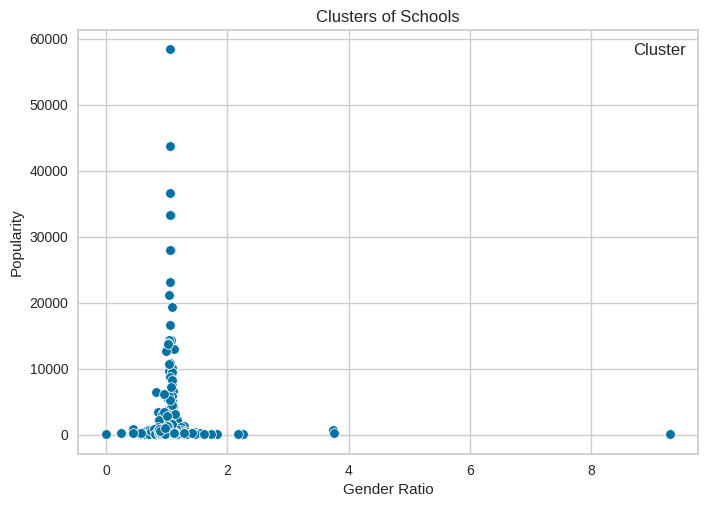

<ipython-input-9-38e87016e323>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=schools_data['Diversity Index'] , y=schools_data['Popularity'], data=schools_data, palette='viridis')


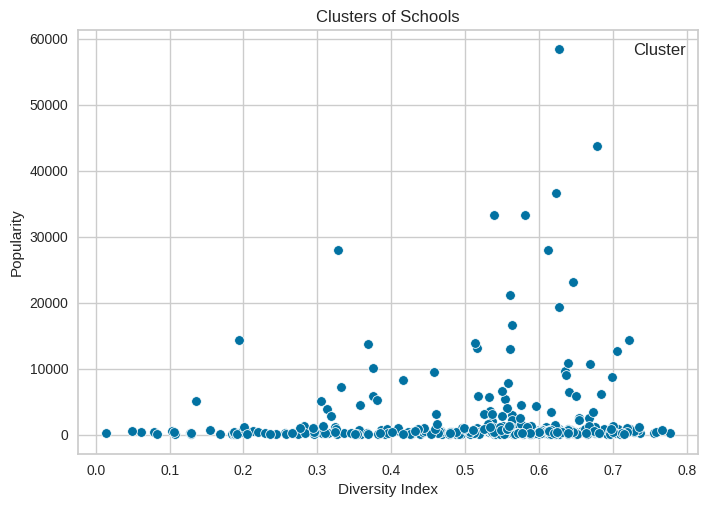

<ipython-input-9-38e87016e323>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=schools_data['Female Students '] , y=schools_data['Asian or Asian/Pacific Islander Students '], data=schools_data, palette='viridis')


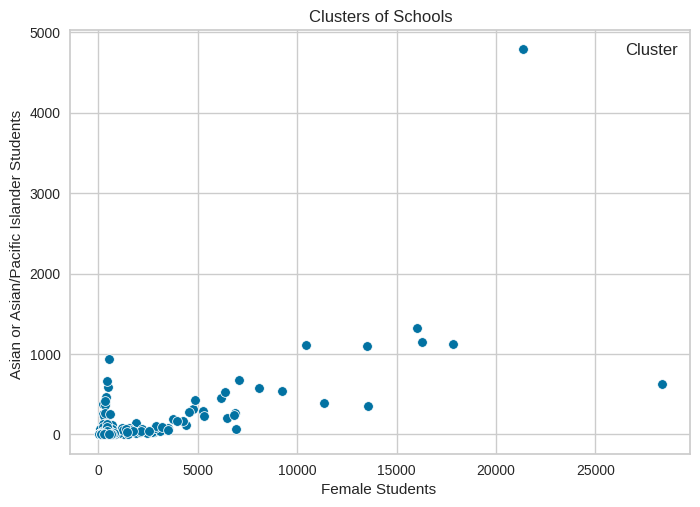

In [9]:
# Feature comparision to decide on clusters
sns.scatterplot(x=schools_data['Gender Ratio'] , y=schools_data['Popularity'], data=schools_data, palette='viridis')
plt.title('Clusters of Schools')
plt.legend(title='Cluster')
plt.show()

sns.scatterplot(x=schools_data['Diversity Index'] , y=schools_data['Popularity'], data=schools_data, palette='viridis')
plt.title('Clusters of Schools')
plt.legend(title='Cluster')
plt.show()

sns.scatterplot(x=schools_data['Female Students '] , y=schools_data['Asian or Asian/Pacific Islander Students '], data=schools_data, palette='viridis')
plt.title('Clusters of Schools')
plt.legend(title='Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

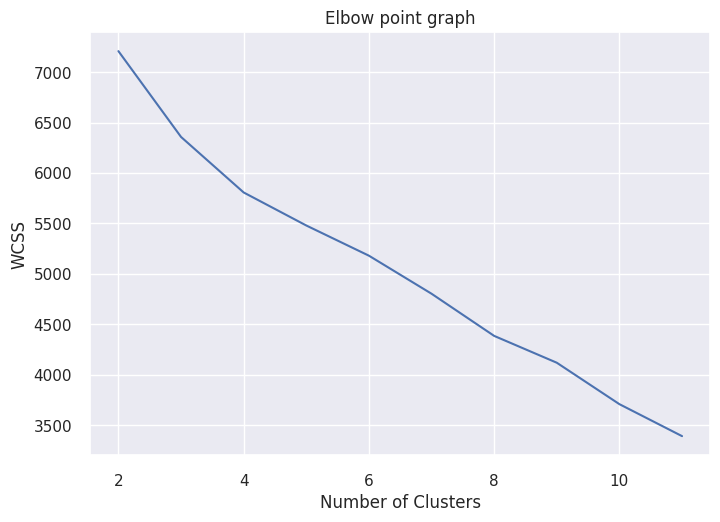

In [10]:
#Experimenting

#WCSS - Within clusters sum of squares
#elbow method
wcss = []
for i in range(2,12):
  kmeans = KMeans(n_clusters = i,init='k-means++', random_state=42)
  kmeans.fit(features_for_clustering_imputed)
  wcss.append(kmeans.inertia_)

#plot wcss graph
sns.set()
plt.plot(range(2,12), wcss)
plt.title("Elbow point graph")
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

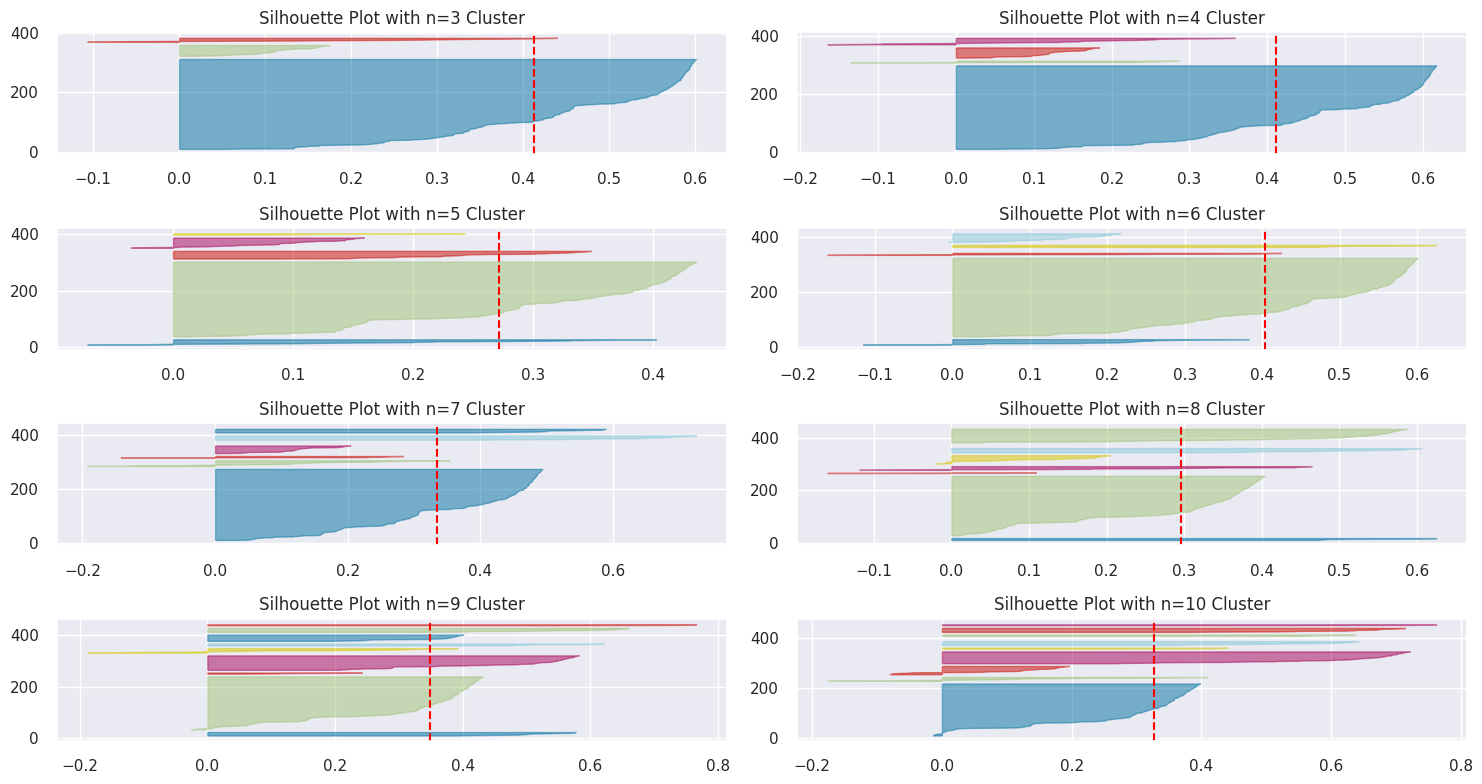

In [11]:
# Silhouette used to decide the ideal number of clusters for k-means
def silhouettePlot(range_, data):
    '''
    we will use this function to plot a silhouette plot that helps us to evaluate the cohesion in clusters (k-means only)
    '''
    half_length = int(len(range_)/2)
    range_list = list(range_)
    fig, ax = plt.subplots(half_length, 2, figsize=(15,8))
    for _ in range_:
        kmeans = KMeans(n_clusters=_, random_state=42)
        q, mod = divmod(_ - range_list[0], 2)
        sv = SilhouetteVisualizer(kmeans, colors="yellowbrick", ax=ax[q][mod])
        ax[q][mod].set_title("Silhouette Plot with n={} Cluster".format(_))
        sv.fit(data)
    fig.tight_layout()
    fig.show()

silhouettePlot(range(3,11), features_for_clustering_imputed)

In [12]:
# Initialize K-means with the number of clusters
num_clusters = 6  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit K-means to the similarity matrix
kmeans.fit(similarity_matrix)

# Get the cluster labels for each school
cluster_labels = kmeans.labels_

# Print the cluster labels for the first few schools
print("Cluster labels for the first few schools:", cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels for the first few schools: [5 3 0 0 2 5 0 5 2 0 0 0 1 5 1 0 0 3 0 1 2 2 3 5 1 3 5 1 5 3 5 3 5 3 1 3 0
 0 5 4 0 5 5 1 3 4 5 0 3 0 0 3 3 0 3 0 5 5 2 0 3 3 3 1 4 1 3 3 5 5 1 1 4 5
 4 4 5 1 3 5 5 5 0 3 3 3 0 1 3 3 5 5 1 3 1 3 1 4 2 3 5 5 5 5 1 1 3 2 3 5 0
 5 0 3 1 0 4 4 3 1 1 2 1 2 3 0 0 0 0 3 3 1 5 4 0 3 0 4 5 0 3 1 5 5 4 4 4 4
 0 1 5 3 2 1 4 0 1 5 3 0 3 5 2 2 1 2 5 1 5 5 4 5 1 2 5 4 4 5 5 5 0 0 0 5 0
 3 1 5 5 1 5 5 3 0 4 5 5 1 0 5 1 1 1 5 3 0 5 5 3 3 0 0 3 3 3 5 3 3 2 2 1 5
 5 3 5 5 3 3 3 1 1 5 5 3 3 1 3 5 5 3 5 5 5 2 5 2 2 4 5 3 2 5 0 0 2 3 3 3 5
 1 3 3 3 5 0 5 5 0 3 1 3 3 5 3 0 5 5 2 1 3 3 0 2 0 2 4 0 2 5 5 5 5 0 3 2 0
 2 5 5 3 3 0 0 2 5 1 5 5 3 5 1 5 0 3 0 5 2 3 5 3 3 3 0 5 0 1 1 5 5 2 2 0 3
 5 5 0 1 2 5 5 3 0 3 3 0 0 2 5 3 3 0 4 5 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='pc_1', ylabel='pc_2'>

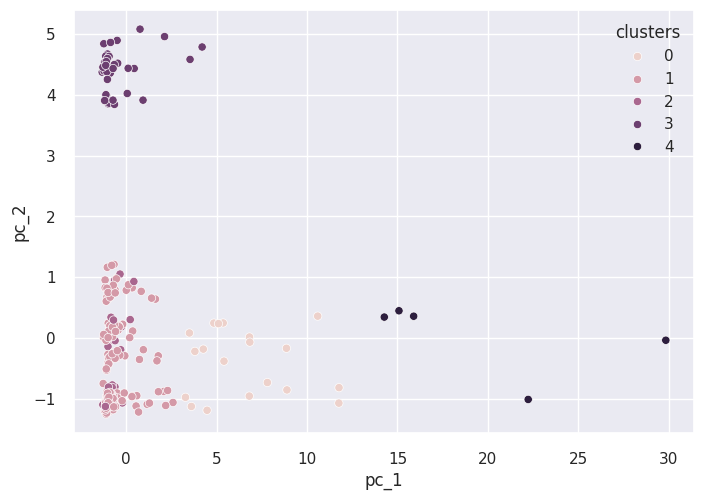

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(features_for_clustering_imputed)
schools_data["clusters"] = cluster_labels

# using PCA to reduce the dimensionality
pca = PCA(n_components=2, whiten=False, random_state=42)
standardized_pca = pca.fit_transform(features_for_clustering_imputed)
df_schools_standardized_pca = pd.DataFrame(data=standardized_pca, columns=["pc_1", "pc_2"])
df_schools_standardized_pca["clusters"] = cluster_labels

# plotting the clusters with seaborn
sns.scatterplot(x="pc_1", y="pc_2", hue="clusters", data=df_schools_standardized_pca)

In [15]:
#Silhoutte score :
kmeans = KMeans(n_clusters=5)  # You can choose the number of clusters
kmeans.fit(features_for_clustering_imputed)
silhouette_avg = silhouette_score(features_for_clustering_imputed, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.4197208032482348


In [16]:
def get_similarSchools(sch_name):
  school_cluster = schools_data[schools_data['School Name']==sch_name]['clusters'].iloc[0]
  print(f"Belongs to Cluster - {school_cluster}")
  findSchoolsInSameCluster(school_cluster)

def findSchoolsInSameCluster(cluster):
  print(schools_data.groupby('clusters').get_group(cluster)['School Name'])

#Give the school name to find the schools similar to it
school = 'AGUA FRIA UNION HIGH SCHOOL DISTRICT (4289)'
get_similarSchools(school)

Belongs to Cluster - 0
4       AGUA FRIA UNION HIGH SCHOOL DISTRICT (4289)
8               ALHAMBRA ELEMENTARY DISTRICT (4280)
20          AMERICAN LEADERSHIP ACADEMY INC. (4348)
98            CARTWRIGHT ELEMENTARY DISTRICT (4282)
123                  DYSART UNIFIED DISTRICT (4243)
163             GLENDALE ELEMENTARY DISTRICT (4271)
165      GLENDALE UNION HIGH SCHOOL DISTRICT (4285)
173           HIGLEY UNIFIED SCHOOL DISTRICT (4248)
218               KYRENE ELEMENTARY DISTRICT (4267)
219               LAVEEN ELEMENTARY DISTRICT (4276)
243           LITCHFIELD ELEMENTARY DISTRICT (4281)
277         PARADISE VALLEY UNIFIED DISTRICT (4241)
287       PHOENIX UNION HIGH SCHOOL DISTRICT (4286)
296             QUEEN CREEK UNIFIED DISTRICT (4245)
316              SCOTTSDALE UNIFIED DISTRICT (4240)
329                    TEMPE SCHOOL DISTRICT (4258)
330         TEMPE UNION HIGH SCHOOL DISTRICT (4287)
337      TOLLESON UNION HIGH SCHOOL DISTRICT (4288)
346    WASHINGTON ELEMENTARY SCHOOL DISTR

In [17]:
#Extra credit : Experimenting with DBSCAN and other validating metrics
dbscan = DBSCAN(eps=0.6, min_samples=15)
dbscan.fit_predict(features_for_clustering_imputed)

silhouette_avg = silhouette_score(features_for_clustering_imputed, dbscan.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.11958431403301467


[ 0.06977864  0.06977864  0.08207192  0.08207192  0.09174092  0.09174092
  0.10154883  0.10154883  0.10315447  0.10315447  0.10917999  0.10917999
  0.11617857  0.11617857  0.11885993  0.11885993  0.12285544  0.12285544
  0.12296854  0.12296854  0.12412778  0.12412778  0.12604109  0.12604109
  0.1314737   0.1328253   0.1328253   0.13390997  0.13519922  0.13733937
  0.13911961  0.13911961  0.14026741  0.14167765  0.14167765  0.14302887
  0.14702414  0.14907677  0.14907677  0.15233655  0.15411036  0.15411036
  0.15731781  0.15804754  0.15945148  0.15945148  0.15973076  0.15973076
  0.1616549   0.16323217  0.16408649  0.16408649  0.16848426  0.1691189
  0.17281071  0.17281071  0.17298479  0.17298479  0.17314973  0.1745917
  0.17479109  0.17499379  0.17558816  0.17569726  0.1769523   0.1769523
  0.17881855  0.17881855  0.18176761  0.18176761  0.18977981  0.18977981
  0.1905141   0.19092925  0.19211984  0.1934387   0.1934387   0.19362698
  0.19362698  0.19401999  0.19401999  0.19436854  0.19

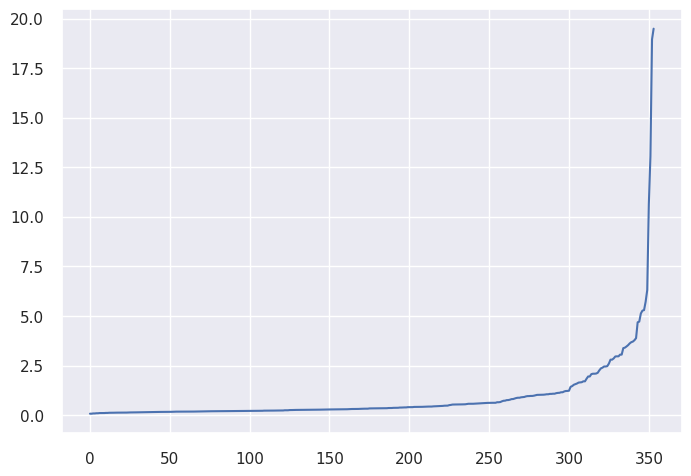

In [18]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(features_for_clustering_imputed)
distances, indices = nearest_neighbors.kneighbors(features_for_clustering_imputed)
distances = np.sort(distances, axis=0)[:, 1]
print(distances)
plt.plot(distances)
plt.show()

Here in this knee plot, the maximum curvature is between 5 and 7.5, hence experimenting with values from 5.1-5.9.

In [19]:
dbscan = DBSCAN(eps=5.6, min_samples=5)
cluster_labels = dbscan.fit_predict(features_for_clustering_imputed)

silhouette_avg = silhouette_score(features_for_clustering_imputed, dbscan.labels_)
print(f"Silhouette Score: {silhouette_avg}")

schools_data["clusters"] = cluster_labels


Silhouette Score: 0.455487281576857


In [20]:
get_similarSchools(school)
cluster_labels

Belongs to Cluster - 0
1            ACADEMY WITH COMMUNITY PARTNERS INC (79213)
2                ACCELERATED LEARNING CENTER INC. (4297)
3                          ACCLAIM CHARTER SCHOOL (4325)
4            AGUA FRIA UNION HIGH SCHOOL DISTRICT (4289)
6      AIBT NON-PROFIT CHARTER HIGH SCHOOL - PHOENIX ...
                             ...                        
349    WEST VALLEY ARTS AND TECHNOLOGY ACADEMY INC. (...
350    WEST-MEC - WESTERN MARICOPA EDUCATION CENTER (...
351    WESTERN SCHOOL OF SCIENCE AND TECHNOLOGY INC. ...
352                   WICKENBURG UNIFIED DISTRICT (4236)
353                    WILSON ELEMENTARY DISTRICT (4261)
Name: School Name, Length: 319, dtype: object


array([ 3,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  2,  2,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  4,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  4,  0,  0,  0,  0,  0,  0,  3,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,
        0,  0,  1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        3,  0,  0,  0,  1

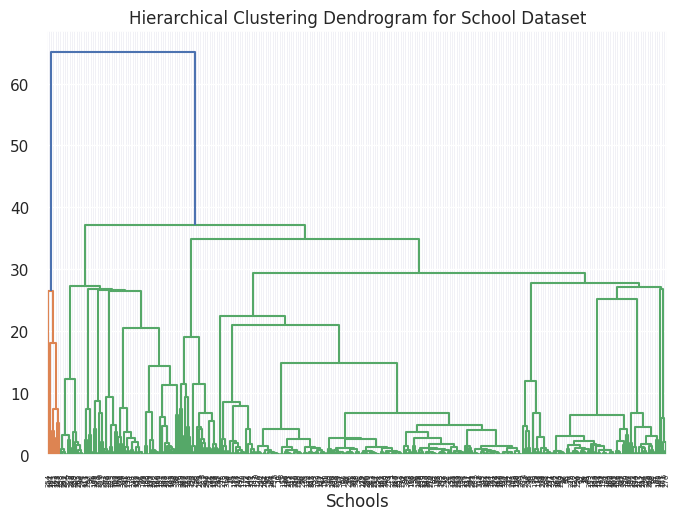

In [21]:
#checking hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Applying Hierarchical Clustering
linked = linkage(features_for_clustering_imputed,'ward')
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram for School Dataset')
plt.xlabel('Schools')
plt.show()

In [22]:
schools_data[schools_data['clusters']==4]

,School Name,Location City,Location ZIP,Latitude,Longitude,LEA Charter Status,"Total Students, All Grades (Excludes AE)","Total Students, All Grades (Includes AE)",Male Students,Female Students,...,Gender Ratio,White Students _Proportion,Black or African American Students _Proportion,Hispanic Students _Proportion,Asian or Asian/Pacific Islander Students _Proportion,American Indian/Alaska Native Students _Proportion,Nat. Hawaiian or Other Pacific Isl. Students _Proportion,Two or More Races Students _Proportion,Diversity Index,clusters
121,DEER VALLEY UNIFIED DISTRICT (4246),PHOENIX,85027,1.102320,-144.661173,0,33199,33199,17152,16047,...,1.068860,0.637429,0.037501,0.220910,0.039971,0.010844,0.002982,0.050363,0.539216,4
123,DYSART UNIFIED DISTRICT (4243),SURPRISE,85374,1.058851,-144.952768,0,23173,23173,11842,11331,...,1.045098,0.401847,0.072326,0.427437,0.017003,0.009321,0.004920,0.067147,0.645677,4
162,GILBERT UNIFIED DISTRICT (4239),GILBERT,85234,0.779697,-144.359020,0,33281,33281,17010,16271,...,1.045418,0.580692,0.031489,0.275503,0.034554,0.012229,0.005168,0.060365,0.580890,4
277,PARADISE VALLEY UNIFIED DISTRICT (4241),PHOENIX,85032,1.054707,-144.583306,0,27919,27919,14406,13513,...,1.066085,0.519431,0.040653,0.335399,0.039292,0.012178,0.002615,0.050432,0.611804,4
284,PEORIA UNIFIED SCHOOL DISTRICT (4237),GLENDALE,85306,1.042710,-144.764031,0,36527,36527,18713,17814,...,1.050466,0.479454,0.052482,0.374901,0.030854,0.009609,0.002984,0.049717,0.623294,4
